In [122]:
import json
import urllib.request
import pandas as pd
import datetime
import io
import requests

In [123]:
# parameters
start = datetime.datetime(2020, 3, 1)
end = datetime.datetime(2020, 8, 15)
step = datetime.timedelta(days = 1)

# Cases

In [124]:
day = start
days = []
while day < end:
    days.append(day.strftime('%Y-%m-%d'))
    day += step

LINK = 'https://epistat.sciensano.be/Data/COVID19BE_CASES_AGESEX.json'
with urllib.request.urlopen(LINK) as url:
    data = json.loads(url.read().decode())

In [125]:
cases = pd.DataFrame(index = days, columns = ['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen'])
cases[['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen']] = [0, 0, 0 ,0]
for record in data:
    try: 
        cases.at[record['DATE'], 'Alles'] += record['CASES']
        if(record['PROVINCE'] == 'WestVlaanderen'): 
            cases.at[record['DATE'], 'Westvlaanderen'] += record['CASES']
        if(record['PROVINCE'] == 'OostVlaanderen'): 
            cases.at[record['DATE'], 'Oostvlaanderen'] += record['CASES']
        if(record['PROVINCE'] == 'Antwerpen'): 
            cases.at[record['DATE'], 'Antwerpen'] += record['CASES']
    except: 
        pass
        #print(record)

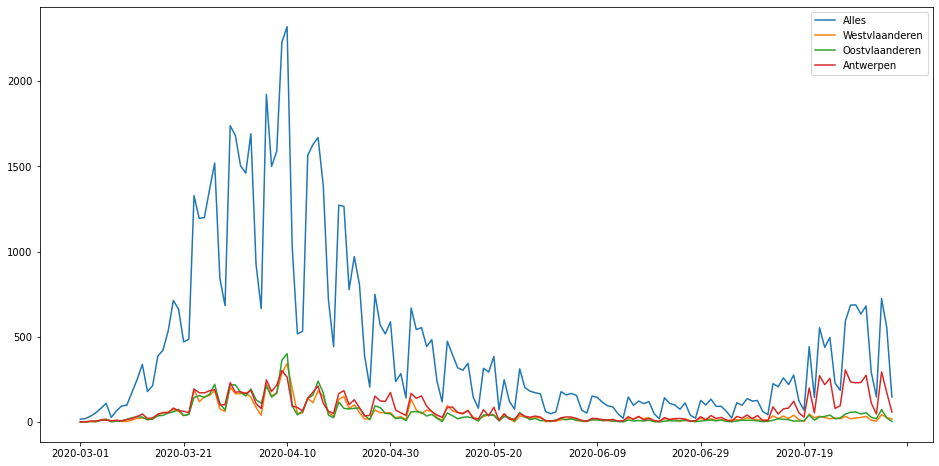

In [126]:
cases[cases['Alles'] != 0].plot(figsize = (16, 8));

In [179]:
cases[cases['Alles'] != 0][-10:]

,Alles,Westvlaanderen,Oostvlaanderen,Antwerpen
2020-07-27,593,33,47,306
2020-07-28,686,19,57,235
2020-07-29,687,24,59,230
2020-07-30,634,27,47,232
2020-07-31,681,33,55,274
2020-08-01,293,11,28,112
2020-08-02,147,5,19,47
2020-08-03,724,43,73,294
2020-08-04,555,27,24,173
2020-08-05,147,17,3,59


# hospitalisations

In [128]:
day = start
days = []
while day < end:
    days.append(day.strftime('%Y-%m-%d'))
    day += step

LINK = 'https://epistat.sciensano.be/Data/COVID19BE_HOSP.json'
with urllib.request.urlopen(LINK) as url:
    data = json.loads(url.read().decode())

In [129]:
hospitalisations = pd.DataFrame(index = days, columns = ['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen'])
hospitalisations[['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen']] = [0, 0, 0 ,0]
for record in data:
    try: 
        hospitalisations.at[record['DATE'], 'Alles'] += record['TOTAL_IN']
        if(record['PROVINCE'] == 'WestVlaanderen'): 
            hospitalisations.at[record['DATE'], 'Westvlaanderen'] += record['TOTAL_IN']
        if(record['PROVINCE'] == 'OostVlaanderen'): 
            hospitalisations.at[record['DATE'], 'Oostvlaanderen'] += record['TOTAL_IN']
        if(record['PROVINCE'] == 'Antwerpen'): 
            hospitalisations.at[record['DATE'], 'Antwerpen'] += record['TOTAL_IN']
    except: 
        pass
        #print(record)

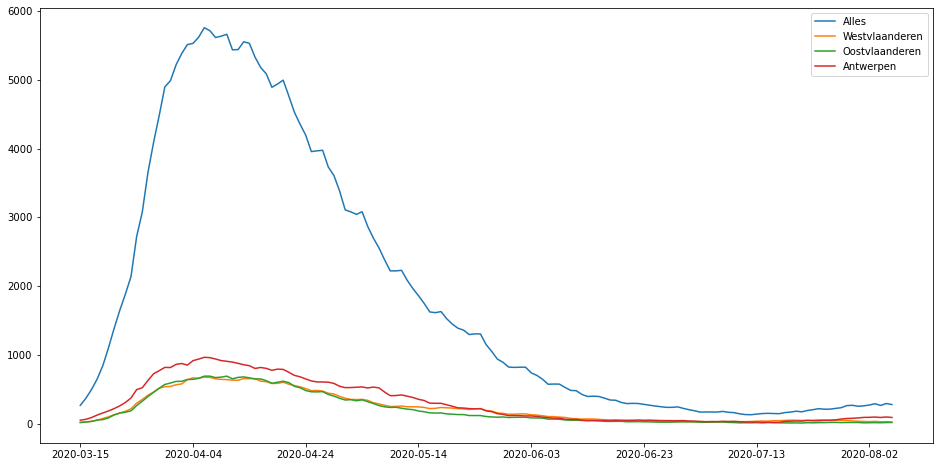

In [130]:
hospitalisations[hospitalisations['Alles'] != 0].plot(figsize = (16, 8));

In [180]:
hospitalisations[hospitalisations['Alles'] != 0][-10:]

,Alles,Westvlaanderen,Oostvlaanderen,Antwerpen
2020-07-28,232,47,15,67
2020-07-29,263,45,17,75
2020-07-30,267,39,17,78
2020-07-31,253,35,17,83
2020-08-01,259,33,12,91
2020-08-02,271,30,14,92
2020-08-03,290,33,15,96
2020-08-04,265,27,13,90
2020-08-05,293,29,16,97
2020-08-06,278,25,17,90


# Municipalities

In [158]:
# parameters
start = datetime.datetime(2020, 3, 31)
end = datetime.datetime(2020, 8, 15)
step = datetime.timedelta(days = 1)

In [159]:
day = start
days = []
while day < end:
    days.append(day.strftime('%Y-%m-%d'))
    day += step

In [164]:
%%time

cumulativeCases = pd.DataFrame(index = days, columns = ['Evergem', 'Gent', 'Antwerpen', 'Mechelen', 'Brugge', 'Brussel', 'Leuven', 'Hasselt'])
cumulativeCases[['Evergem', 'Gent', 'Antwerpen', 'Mechelen', 'Brugge', 'Brussel', 'Leuven', 'Hasselt']] = [0, 0, 0 ,0, 0, 0, 0, 0]

day = start
while day < end:
    try:
        LINK = 'https://epistat.sciensano.be/Data/' + day.strftime('%Y%m%d') + '/COVID19BE_CASES_MUNI_CUM_' + day.strftime('%Y%m%d') + '.csv'
        data = pd.read_csv(io.StringIO(requests.get(LINK).content.decode('latin1')))
    except: break
    try:
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Evergem'] = int(data[data['TX_DESCR_NL'] == 'Evergem']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Gent'] = int(data[data['TX_DESCR_NL'] == 'Gent']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Antwerpen'] = int(data[data['TX_DESCR_NL'] == 'Antwerpen']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Mechelen'] = int(data[data['TX_DESCR_NL'] == 'Mechelen']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Brugge'] = int(data[data['TX_DESCR_NL'] == 'Brugge']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Brussel'] = int(data[data['TX_DESCR_NL'] == 'Brussel']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Hasselt'] = int(data[data['TX_DESCR_NL'] == 'Hasselt']['CASES'].values[0])
        cumulativeCases.at[day.strftime('%Y-%m-%d'), 'Leuven'] = int(data[data['TX_DESCR_NL'] == 'Leuven']['CASES'].values[0])
    except: pass
    day += step

Wall time: 36.8 s


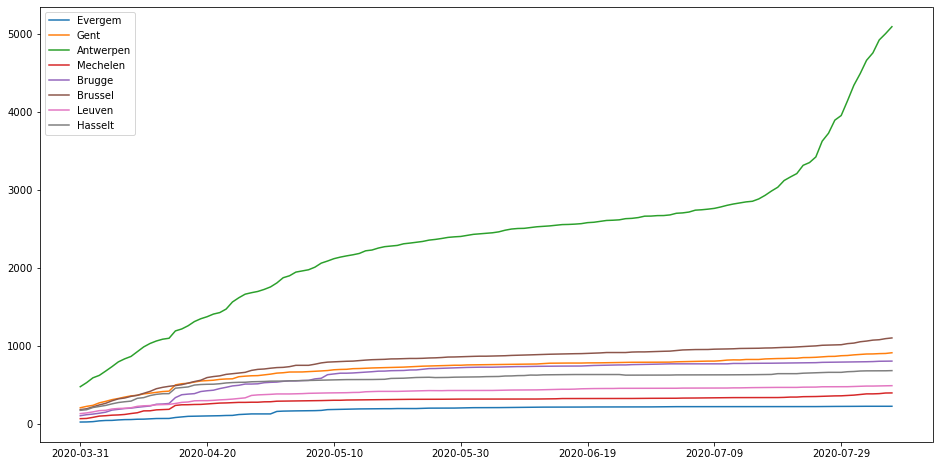

In [165]:
cumulativeCases.plot(figsize = (16, 8));

In [181]:
cumulativeCases[-10:]

,Evergem,Gent,Antwerpen,Mechelen,Brugge,Brussel,Leuven,Hasselt
2020-07-28,225,867,3895,360,791,1013,477,662
2020-07-29,225,875,3954,361,793,1016,478,662
2020-07-30,226,878,4144,365,793,1030,478,670
2020-07-31,226,886,4342,370,795,1037,481,673
2020-08-01,227,891,4492,378,796,1054,484,679
2020-08-02,227,897,4662,386,798,1063,486,681
2020-08-03,227,898,4757,386,800,1075,486,681
2020-08-04,227,902,4923,389,804,1080,488,682
2020-08-05,227,904,5004,397,805,1094,490,682
2020-08-06,227,913,5093,398,806,1103,491,684
